['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


<function matplotlib.pyplot.show(*args, **kw)>

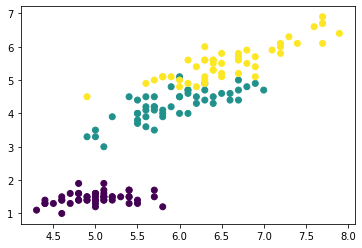

In [45]:
#Notebook I did while researching and implementing some introductory KMeans algorithm excercises from various sources.

import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans


#load in dataset
iris_df = datasets.load_iris()

#Methods of dataset
print(dir(iris_df))

#Features of dataset
print(iris_df.feature_names)

#Targets of dataset
print(iris_df.target)

#Target names of dataset
print(iris_df.target_names)

#Slicing the dataset
x_axis = iris_df.data[:, 0]
y_axis = iris_df.data[:, 2]

#Scatter plot creation to show dataset
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show

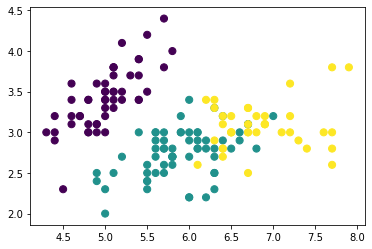

In [46]:
#First KMeans clustering algorithm implementation. 
#For this implementation, we will use 3 clusters that the algorithm will create

#Model creation and fit
km = KMeans(n_clusters=3)
km.fit(iris_df.data)

predicted_label = km.predict([[7.2, 3.5, 0.8, 1.6]])

all_predict = km.predict(iris_df.data)


plt.scatter(iris_df.data[:, 0], iris_df.data[:, 1], c=all_predict, s = 50, cmap='viridis')

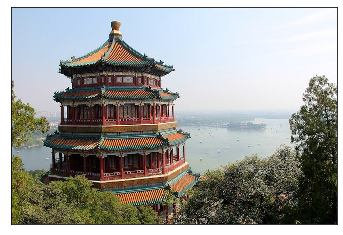

In [47]:
#While the algorithm did cluster relatively well, we need a dataset with more datapoints to show what it can really do.
#Lets try to represent an image with 16 million colored pixels, have KMeans assign each pixel to the nearest color cluster.
#Essentially we will reduce the amount of colors from 16 million to 16, and then see how our image changes

pic = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(pic)

In [48]:
#This reduces our color scale to 0 - 1
data = pic / 255.0 

data = data.reshape(427 * 640, 3)

data.shape

(273280, 3)

In [49]:
#Function to plot pixels in this color space.
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    r = np.random.RandomState(0)
    i = r.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig,ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

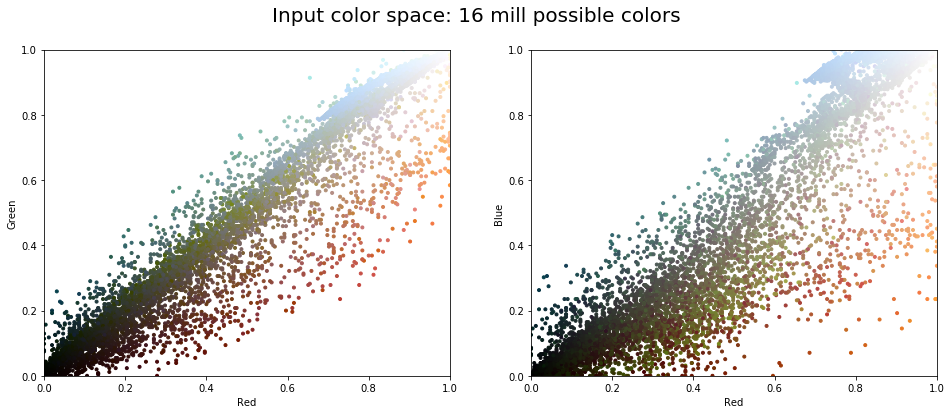

In [50]:
plot_pixels(data, title="Input color space: 16 mill possible colors")

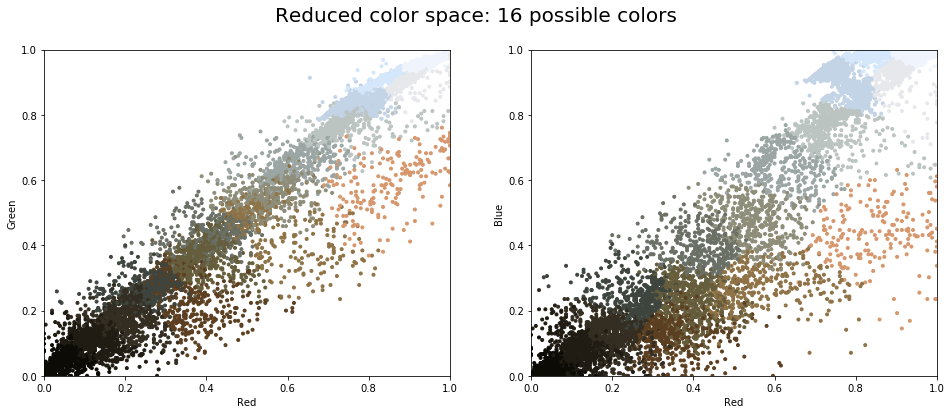

In [51]:
#Utilizing the KMeans algorithm, each pixel is given the color of its closest cluster. 
km_pixel = MiniBatchKMeans(16)
km_pixel.fit(data)
new_colors=km_pixel.cluster_centers_[km_pixel.predict(data)]

plot_pixels(data, colors=new_colors, title = "Reduced color space: 16 possible colors")

Text(0.5, 1.0, '16-color Image')

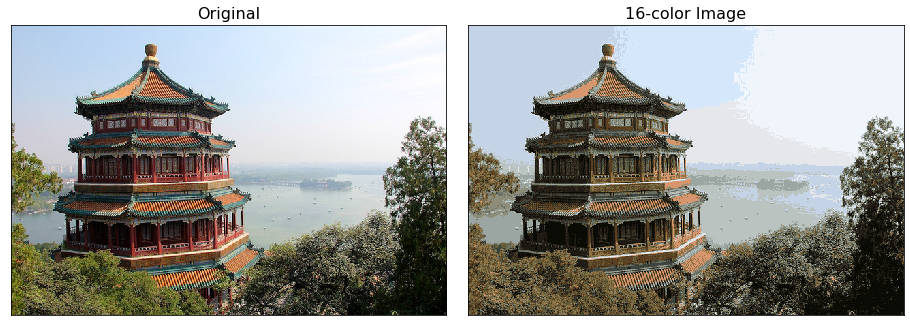

In [52]:
#The difference with our new color space from the KMeans algorithm is shown in the picture on the right.
#Obviously there is better ways to compress images than this, but this was good practice to get the concept of how
#a KMeans clustering algorithm works.

pic_recolored = new_colors.reshape(pic.shape)

fig,ax = plt.subplots(1,2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(pic)
ax[0].set_title('Original', size=16)
ax[1].imshow(pic_recolored)
ax[1].set_title('16-color Image', size=16)